In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

## Entendimiento de los datos <br>
### Leer Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.000,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.000,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.225,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.500,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.225,NaN,C


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Ver valores duplicados

In [6]:
df_train.duplicated().sum()

0

## valores nulos

In [7]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## valores unicos

In [8]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
columnas_categoricas = df_train.select_dtypes(include=['object']).columns
for column in columnas_categoricas:
    if df_train[column].nunique() <=10:
        print(f"{column}: {df_train[column].unique()}")

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


In [10]:
columnas_categoricas = df_train.select_dtypes(include=['int64', 'float64']).columns
for column in columnas_categoricas:
    if df_train[column].nunique() <=10:
        print(f"{column}: {df_train[column].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]


# EDA (exploratory Data Analysis)

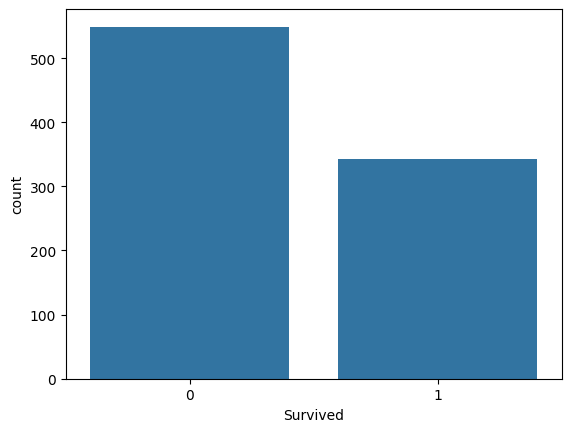

In [11]:
#Cantidad de sobrevivientes
sns.countplot(x='Survived', data=df_train)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_25128\2649220767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data = df_train, palette=colores)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


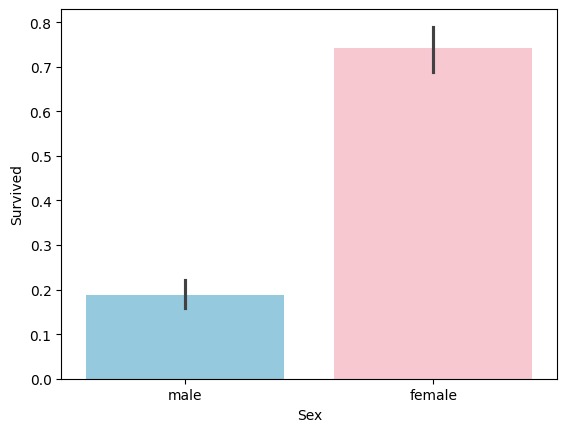

In [15]:
#¿De que sexo sobrevivieron más?
colores = {"male": "skyblue", "female": "pink"}
sns.barplot(x='Sex', y='Survived', data = df_train, palette=colores)
plt.show()

# Conclusiones
* Cabin, Fare, ticket y name no aportan a la predicción ---> Eliminar

In [16]:
df_train = df_train.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])
df_test = df_test.drop(columns=['Cabin', 'Fare', 'Ticket', 'Name'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


## Preparación de los datos
### Separación de predictoras y target

In [17]:
X = df_train.drop(columns=['Survived'])
Y = df_train.Survived

## Pasar columnas categoricas a númericas

In [18]:
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols]) # Sirve para pasar de categoricos a numericos

In [19]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0


## Rellenar nulos

In [20]:
imputer = SimpleImputer() #Sirve para rellenar valores faltantes NaN
x_transformed = pd.DataFrame(imputer.fit_transform(X)) #El proceso de imputado le quita las columnas al dataframe le vamos a pasar

x_transformed.columns = X.columns

In [21]:
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

# Model

In [22]:
model = RandomForestClassifier()
model.fit(x_transformed, Y)

RandomForestClassifier()

# Predictions

In [23]:
df_test[object_cols] = ordinal_encoder.fit_transform(df_test[object_cols])

df_test_transformed = pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns = df_test.columns

predictions = model.predict(df_test_transformed)

# Submission

In [24]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('Submission.csv', index = False)